In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
import statistics as stat
import math
from matplotlib import pyplot as plt
import datetime
import warnings
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
#import all needed datasets
#since there are a lot of datasets, I'm not going to show each of them.
custdb = pd.read_csv('datasets/olist_customers_dataset.csv')
orderitems = pd.read_csv('datasets/olist_order_items_dataset.csv')
orderpmt = pd.read_csv('datasets/olist_order_payments_dataset.csv')
orderreview = pd.read_csv('datasets/olist_order_reviews_dataset.csv')
orderdet = pd.read_csv('datasets/olist_orders_dataset.csv')
productdb = pd.read_csv('datasets/olist_products_dataset.csv')
sellerdb = pd.read_csv('datasets/olist_sellers_dataset.csv')
prodtrans = pd.read_csv('datasets/product_category_name_translation.csv')
geolocdb = pd.read_csv('datasets/olist_geolocation_dataset.csv')

# Exploratory Analysis - Part 1

As part of our journey in using this dataset, it's best for us to understand the properties of what we are working on. Let's start with the very first step, data cleaning.

In [3]:
#check for NA values in category name then remove them to avoid errors
productdb[productdb.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [4]:
#change product category to english, we use the english version from this point on
#using inner join immediately remove rows with no category name
engprod = pd.merge(productdb, prodtrans, on = 'product_category_name')
engprod = engprod.drop('product_category_name', axis = 1)

#check once more for incomplete rows
engprod[engprod.isna().any(axis=1)]

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
4037,09ff539a621711667c43eba6a3bd8466,60.0,865.0,3.0,NaN,NaN,NaN,NaN,baby


Since we're going to focus on the quantity in sales, we are going to keep this row.

Now, let's clean the other datasets, starting from finding incomplete rows. Below are the datasets I've found that had incomplete rows. The datasets that aren't listed below has complete rows, meaning no NA values.

In [5]:
#ORDER REVIEWS
orderreview[orderreview.isna().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


It is normal to have NA values in reviews because most of the time customers don't leave any review. So let's just keep it that way.

Now let's take a look at the order status in the order details dataset.

In [6]:
orderdet['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

From wrangling the data, here is what we can derive in regards of the normal flow of shipment:

Created -> Invoiced -> Approved -> Processing -> Shipped -> Delivered

with noting that:
- cancelation can occur anytime
- unavailable meaning the shipping could be delayed

After wrangling some more, this dataset shows the latest condition for each order_id, hence the dataset has unique records. Since our goal is to understand the purchasing behaviour, let's consider the delivered orders for now.

In [7]:
orderdets=orderdet[orderdet['order_status']=='delivered'].sort_values(by=['order_id'])
orderdets[orderdets.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
84999,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaN,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31 00:00:00
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00
72407,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaN,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23 00:00:00


From this extract, we understand that some delivered orders have incomplete rows, in other words, invalid delivered orders. This might be an error in the tracking system or even worse, fake orders. But for now, let's keep this in mind and continue with our exploratory analysis. If somehow you decided to remove these rows from the beginning, that would do just fine since it only contains 23 incomplete records or covers approximately 0.023% of the full dataset.

The order items dataset has a unique way of tracking their purchases. Each order_id may have multiple order_item_id representing the same product. This is not a duplicate but merely represents the quantity of that product being purchased. For example, let's look at order_id '00571ded73b3c061925584feab0db425'.

In [8]:
orderitems[orderitems['order_id']=='f60ce04ff8060152c83c7c97e246d6a8']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
108262,f60ce04ff8060152c83c7c97e246d6a8,1,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108263,f60ce04ff8060152c83c7c97e246d6a8,2,872db866d615db59612ac933f43d6b22,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108264,f60ce04ff8060152c83c7c97e246d6a8,3,872db866d615db59612ac933f43d6b22,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108265,f60ce04ff8060152c83c7c97e246d6a8,4,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108266,f60ce04ff8060152c83c7c97e246d6a8,5,872db866d615db59612ac933f43d6b22,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108267,f60ce04ff8060152c83c7c97e246d6a8,6,872db866d615db59612ac933f43d6b22,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108268,f60ce04ff8060152c83c7c97e246d6a8,7,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108269,f60ce04ff8060152c83c7c97e246d6a8,8,872db866d615db59612ac933f43d6b22,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108270,f60ce04ff8060152c83c7c97e246d6a8,9,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04
108271,f60ce04ff8060152c83c7c97e246d6a8,10,58efb9b638561ce132216a9a612513e2,701938c450705b8ae65fc923b70f35c7,2017-12-04 22:31:28,109.97,34.04


But on the other hand, the order_item_id, which represents the number of products being purchased, might also note for multiple products. Here are order_id '005d9a5423d47281ac463a968b3936fb' for reference.

In [9]:
orderitems[orderitems['order_id']=='005d9a5423d47281ac463a968b3936fb']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
151,005d9a5423d47281ac463a968b3936fb,1,fb7a100ec8c7b34f60cec22b1a9a10e0,d98eec89afa3380e14463da2aabaea72,2017-10-24 12:28:16,49.99,18.12
152,005d9a5423d47281ac463a968b3936fb,2,4c3ae5db49258df0784827bdacf3b396,d98eec89afa3380e14463da2aabaea72,2017-10-24 12:28:16,24.99,13.58
153,005d9a5423d47281ac463a968b3936fb,3,4c3ae5db49258df0784827bdacf3b396,d98eec89afa3380e14463da2aabaea72,2017-10-24 12:28:16,24.99,13.58


With these in mind, let's change the dataset to have order quantity for each product in each order instead of using order_item_id. Personally, using quantity is much easier than using this recording method. Albeit the unusual recording method, this would come in handy if each product is related with a campaign, such as promos. But that would be a talk for another day :)

In [10]:
#Create a temporary dataframe for the iteration process
orderqty=pd.DataFrame({})
tempdf = orderitems[['order_id','product_id']]
tempdf = tempdf.sort_values(['order_id','product_id'], ascending = ['False','False'])
orderqty['orderproduct']=list(zip(tempdf['order_id'],tempdf['product_id']))

In [11]:
#Looping process to acquire quantity per item in each order
item_qty = []
order_id=[]
prod_id=[]
i=0
for (orderid,prodid) in orderqty['orderproduct']:
    if i == 0:
        order_id.append(orderid)
        prod_id.append(prodid)
        cur_count = 1
        item_qty.append(cur_count)
    else:
        if orderqty['orderproduct'][i]==orderqty['orderproduct'][i-1]:
            cur_count = cur_count+1
            item_qty[-1]=cur_count
        else:
            order_id.append(orderid)
            prod_id.append(prodid)
            cur_count = 1
            item_qty.append(cur_count)
    i=i+1

orderqty = pd.DataFrame({})
orderqty['order_id']=order_id
orderqty['product_id']=prod_id
orderqty['item_qty']=item_qty
orderqty

,order_id,product_id,item_qty
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1
...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1


In [12]:
#Revamped dataset
orderitems=orderitems.drop('order_item_id', axis = 1).sort_values(['order_id','product_id'], ascending = [False,False]).drop_duplicates(inplace=False)
orderitems = pd.merge(orderitems, orderqty, on = ['order_id','product_id'])
orderitems

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_qty
0,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,1
1,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1
2,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1
3,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1
4,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1
...,...,...,...,...,...,...,...
102420,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1
102421,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
102422,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
102423,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1


Looking good! :)

# Dataset Preparation

In this part, we will create few datasets to create our models. We will observe customer's loyalty by these factors:
- Order Review: customers who had great review on their order might have created a trust to purchase from the store
- Total Payment per Order: The higher the payment along with high order review would increase the retention rate towards the store since the customer had paid high amount with high satisfaction on the purchase.
- Freight Value to Payment Ratio: Higher freight value usually indicates longer distance between the seller and the customer. The further the distance the lower the frequency of purchase will be.

## Data Wrangling

In this step, we will create a database for the delivered orders by merging each dataset appropiately. We will also create a summary for payment type used and product purchased per category from the existing orders. Since each order can use multiple payments, the payment records will be summarized into a seperate data frame with the number of payment types used in the order. This separation also applies when we're summarizing the number of products purchased by each category. Both summaries will be used for additional analysis.

In [13]:
#The delivered order dataset
orderdb = (orderdet[['customer_id','order_id']][orderdet['order_status']=='delivered']
           .merge(orderitems[['order_id','product_id','price','freight_value','item_qty']], how = 'left', on = 'order_id')
           .merge(engprod[['product_id','product_category_name_english']], how = 'left', on = 'product_id')
           .sort_values(by = 'customer_id')
          )
orderdb = orderdb.assign(total_price=orderdb['price']+orderdb['freight_value'])
orderdb = orderdb.assign(total_payment = orderdb['total_price']*orderdb['item_qty']).drop_duplicates()
orderdb

,customer_id,order_id,product_id,price,freight_value,item_qty,product_category_name_english,total_price,total_payment
69091,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,64315bd8c0c47303179dd2e25b579d00,89.80,24.94,1,toys,114.74,114.74
10120,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,84183944dc7cddca87a5d384452c1d3c,54.90,12.51,1,health_beauty,67.41,67.41
66385,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,9df2b21ec85378d71df4404712e17478,179.99,15.43,1,baby,195.42,195.42
43493,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,af3ec22cce878225aae6d9eb6c7a78eb,149.90,29.45,1,cool_stuff,179.35,179.35
5959,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,868b3136c5b206f91b8208fbfdf2cb7c,93.00,14.01,1,bed_bath_table,107.01,107.01
...,...,...,...,...,...,...,...,...,...
35253,fffcb937e9dd47a13f05ecb8290f4d3e,620ddc9fbe3e445676a8e71d4a830821,2eb705094d8383cfa50e8965dddc8a7e,78.00,13.91,1,books_general_interest,91.91,91.91
15242,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,c045b19fdb30a3035c56d04c6fe2e622,54.90,26.46,1,bed_bath_table,81.36,81.36
95286,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,d5c263f4d651ba657c900ce70a4be7de,47.90,15.23,1,telephony,63.13,63.13
43565,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,e61c78a7343d82c0539d27df0f7dfc31,199.90,14.23,1,bed_bath_table,214.13,214.13


In [14]:
#Summarize by the number of payment type used in each order
temp = pysqldf("select distinct order_id, payment_type, count(payment_type) as no_pmt from orderpmt group by 1,2")
orderpmt_sum = (orderdb[['customer_id','order_id']].merge(temp, on = 'order_id',how = 'left')
                .drop_duplicates().sort_values(['customer_id','order_id','no_pmt'], ascending=[True,True,False]))
orderpmt_sum

,customer_id,order_id,payment_type,no_pmt
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,credit_card,1.0
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,credit_card,1.0
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,credit_card,1.0
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,boleto,1.0
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,boleto,1.0
...,...,...,...,...
102468,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,voucher,2.0
102467,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,credit_card,1.0
102469,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,credit_card,1.0
102470,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,credit_card,1.0


In [15]:
voucherdf = orderpmt_sum[orderpmt_sum["payment_type"]=="voucher"].reset_index(drop=True)
is_voucher = [1]*voucherdf.shape[0]
voucherdf['is_voucher']=is_voucher
orderpmt_sum = (orderpmt_sum[orderpmt_sum["payment_type"]!="voucher"].reset_index(drop=True)
                .merge(voucherdf[["customer_id","order_id","is_voucher","no_pmt"]], how = 'left', on = ['customer_id','order_id']).fillna(0)
                .rename(columns={"no_pmt_x": "no_pmt", "no_pmt_y": "no_voucher"})
               )
orderpmt_sum

,customer_id,order_id,payment_type,no_pmt,is_voucher,no_voucher
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,credit_card,1.0,0.0,0.0
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,credit_card,1.0,0.0,0.0
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,credit_card,1.0,0.0,0.0
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,boleto,1.0,0.0,0.0
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,boleto,1.0,0.0,0.0
...,...,...,...,...,...,...
94976,fffcb937e9dd47a13f05ecb8290f4d3e,620ddc9fbe3e445676a8e71d4a830821,credit_card,1.0,0.0,0.0
94977,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,credit_card,1.0,1.0,2.0
94978,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,credit_card,1.0,0.0,0.0
94979,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,credit_card,1.0,0.0,0.0


In [16]:
#Summarize by the number of purchased products
ordercat_sum = (pysqldf("select distinct customer_id, order_id, product_category_name_english, sum(item_qty) as total_bought from orderdb group by 1,2")
               .sort_values(['customer_id','order_id','total_bought'], ascending = [True,True,False]))
ordercat_sum

,customer_id,order_id,product_category_name_english,total_bought
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,toys,1
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,health_beauty,1
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,baby,1
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,cool_stuff,1
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,bed_bath_table,1
...,...,...,...,...
96473,fffcb937e9dd47a13f05ecb8290f4d3e,620ddc9fbe3e445676a8e71d4a830821,books_general_interest,1
96474,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,bed_bath_table,1
96475,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,telephony,1
96476,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,bed_bath_table,1


In [17]:
#Pick the necessary columns
temp = pysqldf("select order_id, avg(review_score) as avg_review from orderreview group by 1")
orderreview_sum = (orderdb[['customer_id','order_id']]
                   .merge(temp[['order_id','avg_review']], on = 'order_id', how ='left')
                   .drop_duplicates()
                  )
orderreview_sum

,customer_id,order_id,avg_review
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,1.0
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,4.0
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,5.0
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,5.0
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,4.0
...,...,...,...
100191,fffcb937e9dd47a13f05ecb8290f4d3e,620ddc9fbe3e445676a8e71d4a830821,5.0
100192,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,3.0
100193,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,4.0
100194,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,5.0


In [18]:
ordercat_sum.to_csv('ordercat.csv', index=False)
orderpmt_sum.to_csv('orderpmt.csv', index = False)

In [19]:
#Dataset with review & average price per order
temp = pysqldf("select distinct order_id,sum(total_payment) as total_payment, avg(total_payment) as avg_payment from orderdb group by 1")
orderreview_sum1 = orderreview_sum.merge(temp, how = 'left', on = 'order_id').drop_duplicates().reset_index(drop=True)
orderreview_sum1

,customer_id,order_id,avg_review,total_payment,avg_payment
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,1.0,114.74,114.74
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,4.0,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,5.0,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,5.0,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,4.0,107.01,107.01
...,...,...,...,...,...
96473,fffcb937e9dd47a13f05ecb8290f4d3e,620ddc9fbe3e445676a8e71d4a830821,5.0,91.91,91.91
96474,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,3.0,81.36,81.36
96475,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,4.0,63.13,63.13
96476,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,5.0,214.13,214.13


In [20]:
#Dataset with review, average payment per order, and freight value ratio to total payment
temp = pysqldf("select distinct order_id, sum(total_payment) as total_payment, avg(total_payment) as avg_payment, (freight_value/total_payment*100) as freight_ratio from orderdb group by 1")
orderreview_sum2 = orderreview_sum.merge(temp, how = 'left', on = 'order_id').drop_duplicates().reset_index(drop=True)
orderreview_sum2

,customer_id,order_id,avg_review,total_payment,avg_payment,freight_ratio
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,1.0,114.74,114.74,21.736099
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,4.0,67.41,67.41,18.558077
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,5.0,195.42,195.42,7.895814
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,5.0,179.35,179.35,16.420407
4,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,4.0,107.01,107.01,13.092234
...,...,...,...,...,...,...
96473,fffcb937e9dd47a13f05ecb8290f4d3e,620ddc9fbe3e445676a8e71d4a830821,5.0,91.91,91.91,15.134371
96474,fffecc9f79fd8c764f843e9951b11341,814d6a3a7c0b32b2ad929ac6328124e9,3.0,81.36,81.36,32.522124
96475,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,4.0,63.13,63.13,24.124822
96476,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,5.0,214.13,214.13,6.645496


### Model 1 - Review Score & Payment

In [21]:
avg_review = np.mean(orderreview_sum1.avg_review)
avg_pmt = np.mean(orderreview_sum1.total_payment)
avg_avgpmt = np.mean(orderreview_sum1.avg_payment)
print(avg_review)
print(avg_pmt)
print(avg_avgpmt)

4.142728566788975
159.82683876116835
155.50816829620175


(0.0, 56790.0)

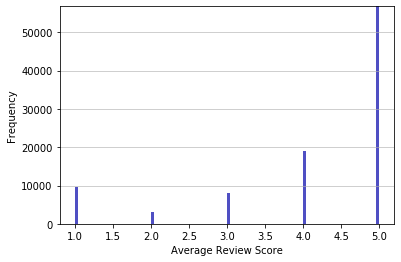

In [22]:
n, bins, patches = plt.hist(x=orderreview_sum1.avg_review, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Average Review Score')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 3630.0)

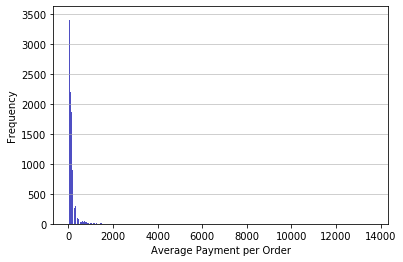

In [23]:
n, bins, patches = plt.hist(x=orderreview_sum1.avg_payment, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Average Payment per Order')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x210de3bd760>,
 'caps': [<matplotlib.lines.Line2D at 0x210de39df40>,
 'boxes': [<matplotlib.lines.Line2D at 0x210de3bd730>],
 'medians': [<matplotlib.lines.Line2D at 0x210de39d8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x210de3bd6d0>],
 'means': []}

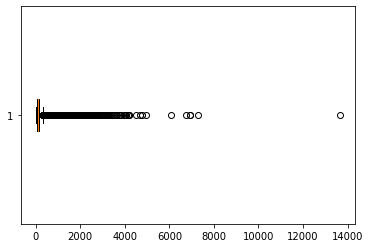

In [24]:
fig1, ax1 = plt.subplots()
ax1.boxplot(orderreview_sum1.avg_payment, vert=False)

In [25]:
np.quantile(np.array(orderreview_sum1.avg_payment),[0.25,0.5,0.75])

array([ 60.64 , 102.315, 171.13 ])

In [26]:
check = pd.DataFrame({})
pmt = []
prop = []
for pmts in list(np.linspace(200,2000,100)):
    pmt.append(pmts)
    prop.append(orderreview_sum1[orderreview_sum1.avg_payment > pmts].shape[0]/orderreview_sum1.shape[0]*100)
check['pmt'] = pmt
check['prop'] = prop
check[check.prop < 5]

,pmt,prop
13,436.363636,4.885052
14,454.545455,4.608304
15,472.727273,4.332594
16,490.909091,4.109745
17,509.090909,3.936649
...,...,...
95,1927.272727,0.224922
96,1945.454545,0.214557
97,1963.636364,0.209374
98,1981.818182,0.204192


- 0 - Will not return
- 1 - Will return

In [27]:
will_return =[]
pmt_bounds = [200,500]
for (review,pmt) in list(zip(orderreview_sum1.avg_review,orderreview_sum1.avg_payment)):
    if review < 3 :
        will_return.append(0)
    elif review == 3:
        if pmt < pmt_bounds[0]:
            will_return.append(1)
        elif pmt_bounds[0] <= pmt < pmt_bounds[1]:
            will_return.append(0)
        elif pmt > pmt_bounds[1]:
            will_return.append(0)
    else:
        will_return.append(1)

In [28]:
idx = np.random.randint(0, len(will_return), size=5000, dtype=int)
for i in list(idx):
    if will_return[i]==0:
        will_return[i]=1
    else:
        will_return[i]=0

In [29]:
from sklearn.model_selection import train_test_split
x = orderreview_sum1.drop(['customer_id','order_id'], axis = 1)
y = will_return
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [30]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve
from sklearn import ensemble
import seaborn as sns

In [31]:
def rocplot(y_test, prob):
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    plt.plot([0, 1], [0, 1], linestyle=':')
    
    # ROC Curve Plot Settings
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
def train(model):
    print('training & predicting model')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    prob = model.predict_proba(x_test)[:,1]
    rocplot(y_test, prob)
    score = metrics.roc_auc_score(y_test, y_pred)
    print(f'AUC score: {score}')

training & predicting model


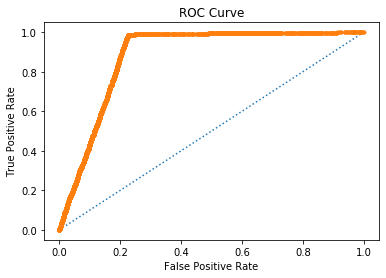

AUC score: 0.8490711011511954


In [32]:
model1 = linear_model.LogisticRegression(max_iter=50)
train(model1)

training & predicting model


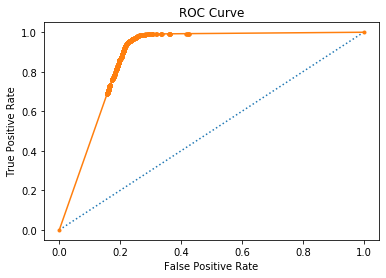

AUC score: 0.861597789712407


In [33]:
model2 = ensemble.RandomForestClassifier(n_estimators=30)
train(model2)

In [34]:
testdata = orderreview_sum1.iloc[x_test.index].reset_index(drop=True)
testdata['will_return']=model1.predict(x_test)
testdata

,customer_id,order_id,avg_review,total_payment,avg_payment,will_return
0,f0833bf12c315d3c01f93d334d6846e1,f885c80f891a4e49ebff85826610e6bf,5.0,96.31,96.31,1
1,87cf8768894da2774a9ba8e181bcd84a,ebe702debf95ffef903434389a46876f,5.0,75.36,75.36,1
2,a7e1e3b3803edc0fe36cd28dd1b296f1,b5b6b559dbbef80f0efc48cbee2423e2,5.0,79.19,79.19,1
3,1738b1d50bc283d77d891200308a32bf,b862519c16da1f1abeacf50d35c11f9b,5.0,32.00,32.00,1
4,9a4bab346d564c0b0afe5f7f5b9854f6,7d3cd94ead444e7d5a948a9e0021c426,5.0,138.72,46.24,1
...,...,...,...,...,...,...
24115,41a940125f7b30d8219a2672baba478c,89be631fd4bcaeb41bbc2f969b37aecf,5.0,1475.08,1475.08,1
24116,845b824eb080c574067dc1f73e58e09e,fdff9465ac9ce1a793bb30fa94c6f241,4.0,523.23,523.23,1
24117,1971e56e0d68a3423956f940b2331b5b,82ad15d5ae6887a26bd03503d58d603f,5.0,34.22,34.22,1
24118,62df8cffaee82da991fa157039a84ff2,c660221edd9f1170175ce048f14b6003,5.0,57.39,57.39,1


In [35]:
testdata.to_csv('testdata.csv', index=False)